Estes es un codigo ejemplo que tiene como objetivo mostrar el funcionamiento de diferentes metodos para seleccion de atributos. Este ejemplo es una modificacion de los ejemplos disponibles en https://github.com/Yimeng-Zhang/feature-engineering-and-feature-selection desarrollados por Yimeng-Zhang. Esta modificacion y adaptacion de los ejemplos origniales ha sido elaborada para el curso introduccion al aprendizaje de maquinas de la maestria en ingenieria de la Universidad del Magdalena.  

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-colorblind')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression

from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from feature_selection import embedded_method

## Load Dataset

In [90]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [92]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Inspección de los datos

## Inspección de datos nulos

In [93]:
data.isna().sum() #Para observar si hay datos nulos en el dataset

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## Distribución de las clases

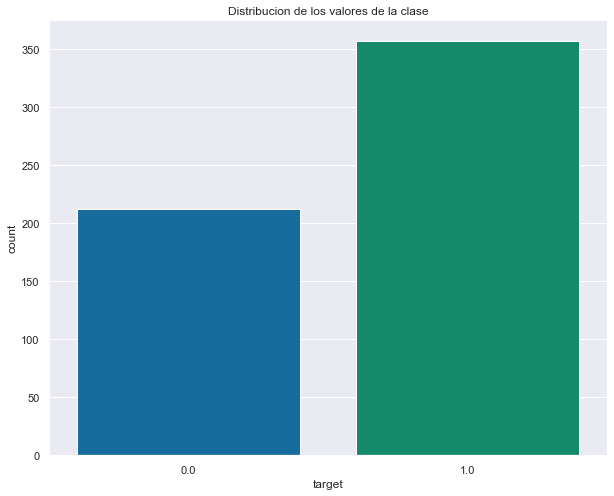

In [94]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x = "target", data=data)
plt.title("Distribucion de los valores de la clase")
plt.show()

## Distribución de las variables predictoras

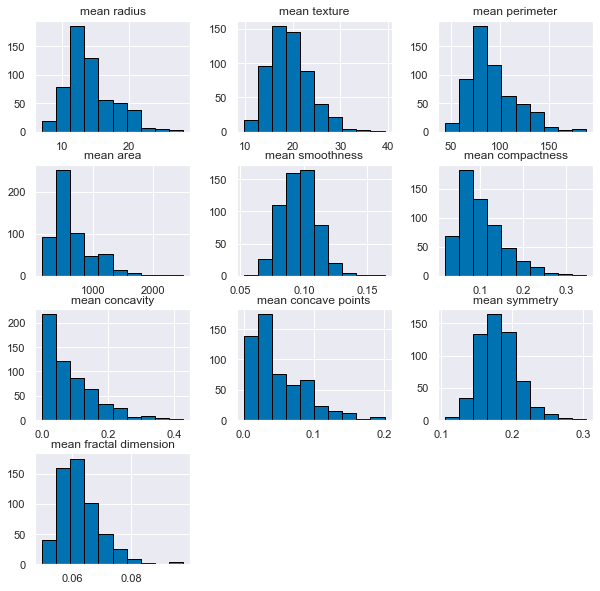

In [95]:
data.hist(['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 
           'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 
           'mean fractal dimension'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

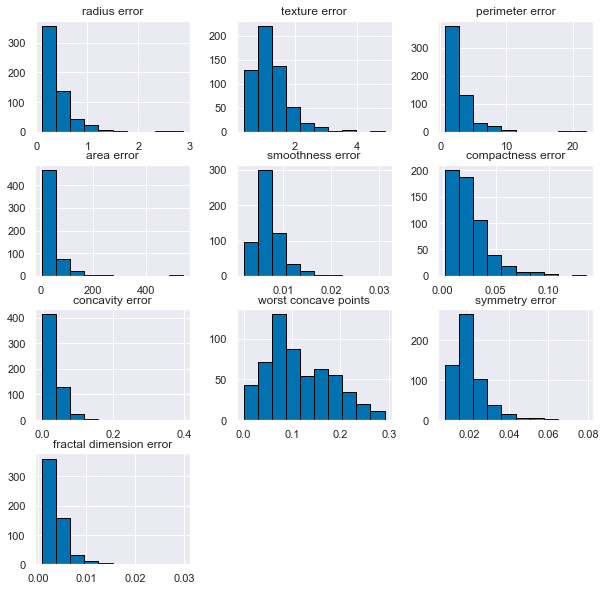

In [96]:
data.hist(['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 
           'compactness error', 'concavity error','worst concave points', 'symmetry error', 
           'fractal dimension error'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

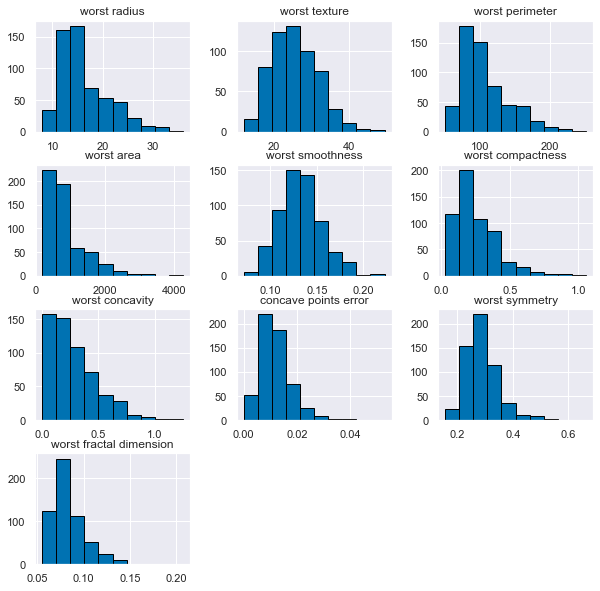

In [97]:
data.hist(['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 
           'worst compactness', 'worst concavity','concave points error', 'worst symmetry', 
           'worst fractal dimension'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Inspección de variables predictoras correlacionadas

In [98]:
X_train = data.drop(['target'], axis=1) # Separa las variables predictoras de las variable a predecir
y_train = data['target']

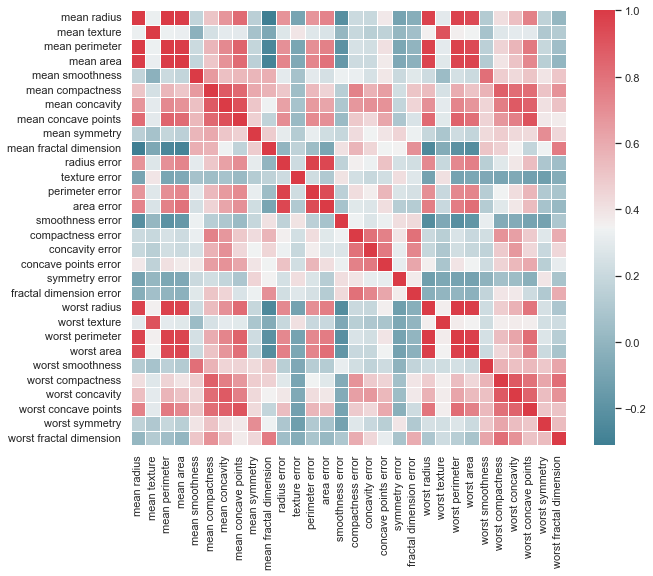

In [99]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5)
plt.show() 

In [100]:
def corr_feature_detect(data, threshold):
     
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] # remove the digonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            # find all features correlated to a single feature
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            # append the block of features to the list
            correlated_groups.append(correlated_block)
    return correlated_groups


In [101]:
corr = corr_feature_detect(data=X_train,threshold=0.95)
for i in corr:
    print(i,'\n')

       feature1         feature2      corr
0   mean radius   mean perimeter  0.997855
4   mean radius        mean area  0.987357
16  mean radius     worst radius  0.969539
20  mean radius  worst perimeter  0.965137 

      feature1         feature2      corr
9   worst area     worst radius  0.984015
10  worst area  worst perimeter  0.977578
25  worst area        mean area  0.959213 

        feature1         feature2      corr
12  radius error  perimeter error  0.972794
28  radius error       area error  0.951830 



En este resultado se puede observar que tres variables están fuertemente correlacionadas con otras variables del estudio, vamos a analizar en más detalles estás tres variables analizando gráficas de dispersión, y aplicando una prueba de correlación no paramétrica, dado que algunas de ellas no muestran una distribución normal.

array([[<AxesSubplot:xlabel='mean radius', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean radius'>,
        <AxesSubplot:xlabel='worst radius', ylabel='mean radius'>,
        <AxesSubplot:xlabel='worst perimeter', ylabel='mean radius'>],
       [<AxesSubplot:xlabel='mean radius', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='worst radius', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='worst perimeter', ylabel='mean perimeter'>],
       [<AxesSubplot:xlabel='mean radius', ylabel='mean area'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean area'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean area'>,
        <AxesSubplot:xlabel='worst radius', ylabel='mean area'>,
        <AxesSubplot:xlabel='worst perimeter', ylabel

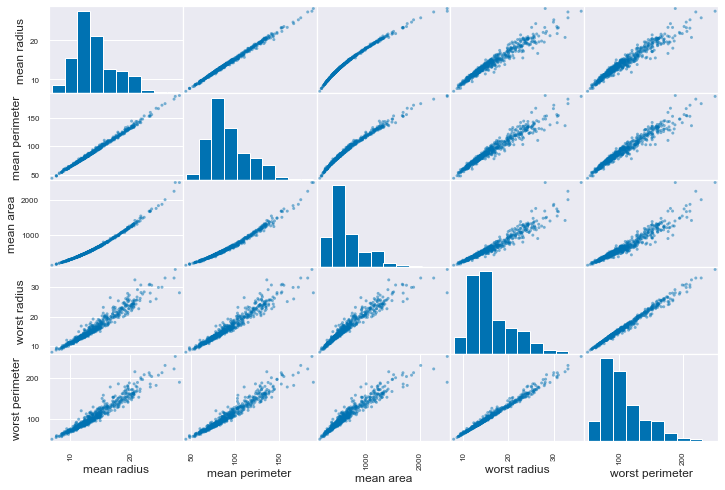

In [102]:
from pandas.plotting import scatter_matrix

cols = ['mean radius', 'mean perimeter', "mean area", 'worst radius', 'worst perimeter']
scatter_matrix(X_train[cols], figsize=(12, 8))


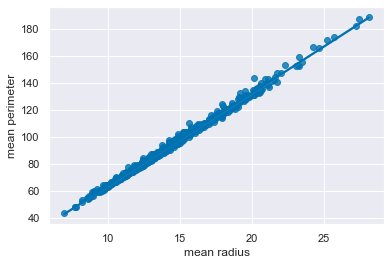

In [103]:
#Explorando un poco más la relación entre mean perimeter y mean radius

sns.regplot(x='mean radius', y='mean perimeter', data=X_train);
sns.set(rc={'figure.figsize':(2,5)})
plt.show()

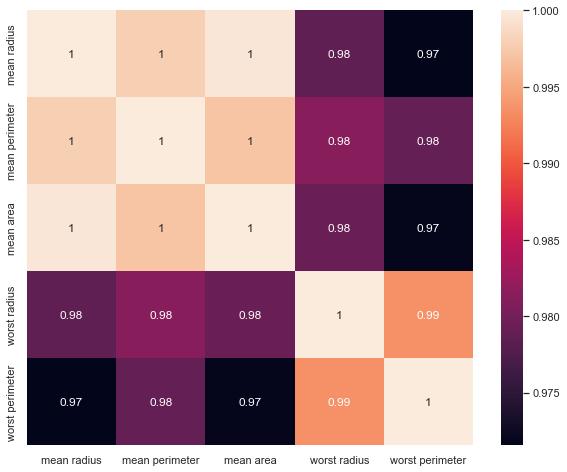

In [104]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train[['mean radius', 'mean perimeter', 'mean area', 
                'worst radius', 'worst perimeter']].corr(method='spearman')
sns.heatmap(corr, annot=True)
plt.show() 

La variable mean radius está correlacionada de acuerdo al coeficiente de correlación de Spearman con las variables mean area y mean perimeter, por lo tanto se debe eliminar del estudio.

array([[<AxesSubplot:xlabel='worst area', ylabel='worst area'>,
        <AxesSubplot:xlabel='worst radius', ylabel='worst area'>,
        <AxesSubplot:xlabel='worst perimeter', ylabel='worst area'>,
        <AxesSubplot:xlabel='mean area', ylabel='worst area'>],
       [<AxesSubplot:xlabel='worst area', ylabel='worst radius'>,
        <AxesSubplot:xlabel='worst radius', ylabel='worst radius'>,
        <AxesSubplot:xlabel='worst perimeter', ylabel='worst radius'>,
        <AxesSubplot:xlabel='mean area', ylabel='worst radius'>],
       [<AxesSubplot:xlabel='worst area', ylabel='worst perimeter'>,
        <AxesSubplot:xlabel='worst radius', ylabel='worst perimeter'>,
        <AxesSubplot:xlabel='worst perimeter', ylabel='worst perimeter'>,
        <AxesSubplot:xlabel='mean area', ylabel='worst perimeter'>],
       [<AxesSubplot:xlabel='worst area', ylabel='mean area'>,
        <AxesSubplot:xlabel='worst radius', ylabel='mean area'>,
        <AxesSubplot:xlabel='worst perimeter', ylabel='

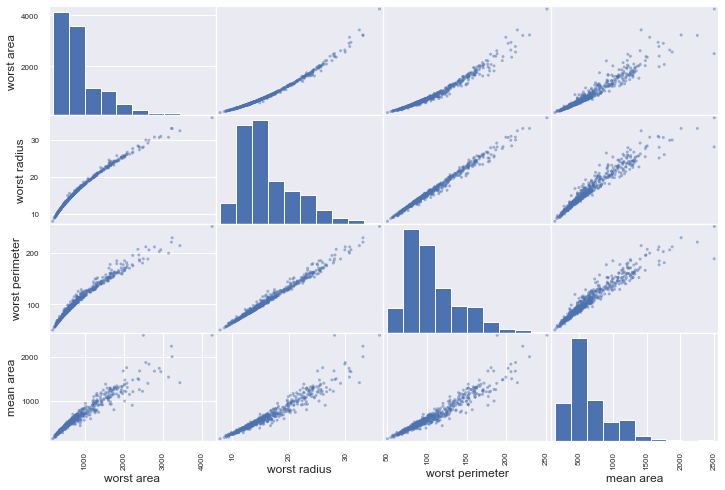

In [105]:
cols = ['worst area', 'worst radius', "worst perimeter", 'mean area']
scatter_matrix(X_train[cols], figsize=(12, 8))


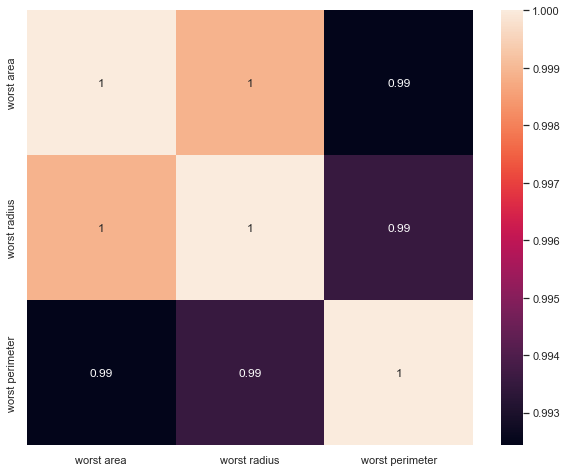

In [106]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train[['worst area', 'worst radius', "worst perimeter"]].corr(method='spearman')
sns.heatmap(corr, annot=True)
plt.show() 

De acuerdo con estos resultados la variable worst area también presenta fuerte correlación con las varialbes worst radius, y worst perimeter, por lo tanto, también será eliminada del estudio. 

array([[<AxesSubplot:xlabel='radius error', ylabel='radius error'>,
        <AxesSubplot:xlabel='perimeter error', ylabel='radius error'>,
        <AxesSubplot:xlabel='area error', ylabel='radius error'>],
       [<AxesSubplot:xlabel='radius error', ylabel='perimeter error'>,
        <AxesSubplot:xlabel='perimeter error', ylabel='perimeter error'>,
        <AxesSubplot:xlabel='area error', ylabel='perimeter error'>],
       [<AxesSubplot:xlabel='radius error', ylabel='area error'>,
        <AxesSubplot:xlabel='perimeter error', ylabel='area error'>,
        <AxesSubplot:xlabel='area error', ylabel='area error'>]],
      dtype=object)

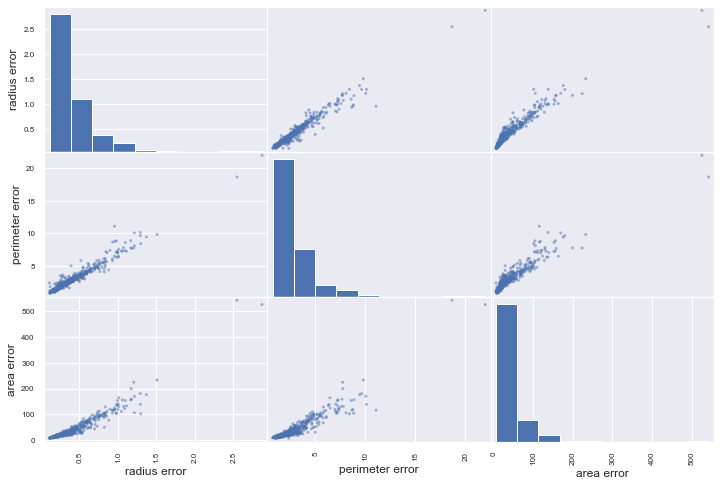

In [107]:
cols = ['radius error', 'perimeter error', "area error"]
scatter_matrix(X_train[cols], figsize=(12, 8))


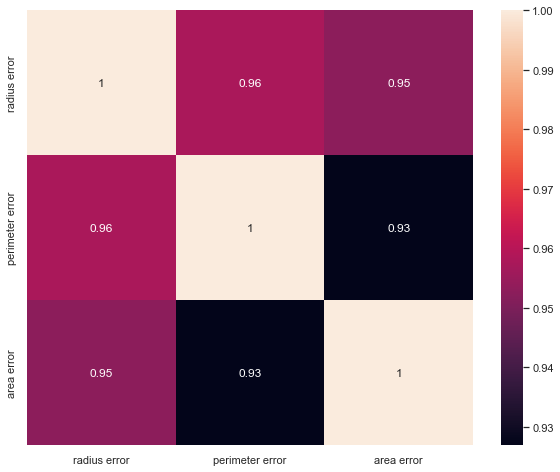

In [108]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train[cols].corr(method='spearman')
sns.heatmap(corr, annot=True)
plt.show() 

En este otro analísis utilizando una prueba de correlación no paramétrica se puede observar que el coeficiente de correlación para las variables del tercer grupo no es 1, como lo fue en el caso de las otras variables. Esta variable se va a dejar en el estudio y miraremos si luego al aplicar métodos de selección de características se sugiere eliminarla. 

In [109]:
X_train.drop(['mean radius', 'worst area'], axis=1, inplace = True) 
#Elimina las variables correlacionadas del estudio

# Seleccion de caracteristica - Filter

## Filtro basado en correlación


Vamos a crear un ranking de la correlación de las variables predictoras según su relación con la variable a predecir, utilizamos el coeficiente de Spearman debido a que algunas variables del estudio podrían no tener una distribución normal.

In [110]:
corr_matrix = data.corr(method='spearman')
corr_matrix = corr_matrix.abs().unstack()
corr_matrix['target'].sort_values(ascending=False)   

target                     1.000000
worst perimeter            0.796319
worst radius               0.787933
worst area                 0.786902
worst concave points       0.781674
mean concave points        0.777877
mean perimeter             0.748496
mean area                  0.734122
mean concavity             0.733308
mean radius                0.732785
area error                 0.714184
worst concavity            0.705734
perimeter error            0.630411
radius error               0.616912
mean compactness           0.609288
worst compactness          0.606810
concave points error       0.488717
worst texture              0.476720
concavity error            0.470338
mean texture               0.461971
worst smoothness           0.425513
worst symmetry             0.396843
compactness error          0.380666
mean smoothness            0.371892
mean symmetry              0.332567
worst fractal dimension    0.311477
fractal dimension error    0.201492
symmetry error             0

No se obseva una fuerte relación de las variables predictoras con respecto a la variable a predecir. 

## Filtro basado en el estadístico Chi_square
Compute chi-squared stats between each non-negative feature and class

In [111]:
# select the top 3 features
chi = ft.chi_square_test(X=X_train,y=y_train,select_k=3)
print(chi)

Index(['mean area', 'area error', 'worst perimeter'], dtype='object')


In [112]:
# select the top 20% features
chi = ft.chi_square_test(X=X_train,y=y_train,select_k=0.2)
print(chi)

Index(['mean perimeter', 'mean area', 'perimeter error', 'area error',
       'worst radius', 'worst perimeter'],
      dtype='object')


# Seleccion de caracteristicas - Embedded

Aplicando regresión como método de clasificación se va a utilizar Lasso; como este es un método que utiliza el descenso por el gradiente para encontrar los parámetros del modelo, entoces se debe escalar los datos. 

In [113]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

# Lasso

In [114]:
# fit the LR model
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='saga'))
sel_.fit(scaler.transform(X_train), y_train)

C:\Users\Unimagdalena\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1', solver='saga'))

In [115]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(selected_feat)
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))
print('features: {}'.format(set(X_train.columns) - set(selected_feat)))

total features: 28
selected features: 25
Index(['mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
       'mean concavity', 'mean concave points', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')
features with coefficients shrank to zero: 3
features: {'mean symmetry', 'concavity error', 'mean compactness'}


# Random Forest Importance

Feature ranking:
1. feature no:6 feature name:mean concave points (0.177853)
2. feature no:19 feature name:worst radius (0.161155)
3. feature no:21 feature name:worst perimeter (0.133610)
4. feature no:25 feature name:worst concave points (0.115327)
5. feature no:2 feature name:mean area (0.082858)
6. feature no:1 feature name:mean perimeter (0.051789)
7. feature no:24 feature name:worst concavity (0.041666)
8. feature no:5 feature name:mean concavity (0.035611)
9. feature no:12 feature name:area error (0.033768)
10. feature no:20 feature name:worst texture (0.020537)
11. feature no:0 feature name:mean texture (0.016760)
12. feature no:11 feature name:perimeter error (0.016093)
13. feature no:15 feature name:concavity error (0.012241)
14. feature no:22 feature name:worst smoothness (0.012096)
15. feature no:3 feature name:mean smoothness (0.010865)
16. feature no:26 feature name:worst symmetry (0.010190)
17. feature no:16 feature name:concave points error (0.009148)
18. feature no:23 f

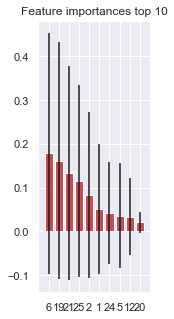

In [116]:
model = embedded_method.rf_importance(X_train=X_train,y_train=y_train,
                             max_depth=10,top_n=10)

In [117]:
# select features whose importance > threshold
feature_selection = SelectFromModel(model, threshold=0.05, prefit=True) 
selected_feat = X_train.columns[(feature_selection.get_support())]
selected_feat

Index(['mean perimeter', 'mean area', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'],
      dtype='object')

In [118]:
# only 12 features have importance > 2 times median
feature_selection2 = SelectFromModel(model, threshold='median',prefit=True) 
selected_feat2 = X_train.columns[(feature_selection2.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat2)))
print(selected_feat2)

total features: 28
selected features: 14
Index(['mean texture', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'perimeter error', 'area error',
       'concavity error', 'worst radius', 'worst texture', 'worst perimeter',
       'worst smoothness', 'worst concavity', 'worst concave points'],
      dtype='object')
